# Project: Wrangling and Analyze Data

## Data Gathering


In [112]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline




In [62]:
twitter_archived = pd.read_csv("twitter_archive_enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [63]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [64]:
image_predictions=pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)


# Save each tweet's returned JSON as a new line in a .txt file


consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
   
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [65]:
tweet_json = pd.read_json("tweet_json.txt", lines=True)


In [66]:
tweet_json =tweet_json[["id","created_at","full_text","source","retweet_count","favorite_count"]] 
                             


## Assessing Data




In [67]:
twitter_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [68]:
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [69]:
#removing retweeted rows
twitter_archived= twitter_archived[twitter_archived['retweeted_status_id'].isnull()]

In [70]:
twitter_archived=twitter_archived.drop(["retweeted_status_id",'retweeted_status_user_id', 'retweeted_status_timestamp',"expanded_urls"], axis = 1)

In [71]:
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   rating_numerator       2175 non-null   int64  
 7   rating_denominator     2175 non-null   int64  
 8   name                   2175 non-null   object 
 9   doggo                  2175 non-null   object 
 10  floofer                2175 non-null   object 
 11  pupper                 2175 non-null   object 
 12  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 237.9+ KB


In [72]:
#checking for duplicates
twitter_archived[twitter_archived.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [73]:
tweet_json

,id,created_at,full_text,source,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048
...,...,...,...,...,...,...
2349,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,"<a href=""http://twitter.com/download/iphone"" r...",41,111
2350,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,"<a href=""http://twitter.com/download/iphone"" r...",147,311
2351,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,"<a href=""http://twitter.com/download/iphone"" r...",47,128
2352,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,"<a href=""http://twitter.com/download/iphone"" r...",48,132


In [74]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              2354 non-null   int64              
 1   created_at      2354 non-null   datetime64[ns, UTC]
 2   full_text       2354 non-null   object             
 3   source          2354 non-null   object             
 4   retweet_count   2354 non-null   int64              
 5   favorite_count  2354 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 110.5+ KB


In [75]:
tweet_json[tweet_json.id.duplicated()]

,id,created_at,full_text,source,retweet_count,favorite_count


### Quality issues
1.timestamp in twitter_archived should be datetime

2.rating_numerator column in twitter_archived is 144 which is an outlier

3.rating_numerator column in twitter_archived is 204 which is an outlier

4.rating_numerator column in twitter_archived is 960 which is an outlier

5.rating_numerator column in twitter_archived is 1776  which is an outlier

6.name column in twitter_archived is "Bookstore"

7.name column in twitter_archived is "none"

8.name column in twitter_archived is "Actually"

### Tidiness issues
1.Source column in `twitter_archived` table should be split 

2.tweet_json and tweet_archived should be in one table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [76]:
twit_arch_clean=twitter_archived.copy()
tweetj_clean=tweet_json.copy()


### Issue #1:

#### Define: 
convert the timestamp column  using the "to_datetime function"

#### Code

In [77]:
twit_arch_clean.timestamp = pd.to_datetime(twit_arch_clean.timestamp)

#### Test

In [78]:
twit_arch_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue #2:

#### Define
Delete the row containing the 144 outlier in ratng_numerator column in twit_arch_clean table

#### Code

In [79]:

twit_arch_clean= twit_arch_clean[twit_arch_clean.rating_numerator != 144]

#### Test

In [80]:
twit_arch_clean[twit_arch_clean.rating_numerator== 144]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:

#### Define
Delete the row containing the 204 outlier in ratng_numerator column in twit_arch_clean table

#### Code

In [81]:
twit_arch_clean= twit_arch_clean[twit_arch_clean.rating_numerator != 204]

#### Test

In [82]:
twit_arch_clean[twit_arch_clean.rating_numerator== 204]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:

#### Define
Delete the row containing the 960 outlier in ratng_numerator column in twit_arch_clean table

#### Code

In [83]:
twit_arch_clean= twit_arch_clean[twit_arch_clean.rating_numerator != 960]

#### Test

In [84]:
twit_arch_clean[twit_arch_clean.rating_numerator== 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:

#### Define
Delete the row containing the 1776 outlier in ratng_numerator column in twit_arch_clean table

#### Code

In [85]:
twit_arch_clean= twit_arch_clean[twit_arch_clean.rating_numerator != 1776]

#### Test

In [86]:
twit_arch_clean[twit_arch_clean.rating_numerator== 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6:

#### Define
Delete the row containing the Bookstore in "name" column in twit_arch_clean table

#### Code

In [87]:
twit_arch_clean=twit_arch_clean[twit_arch_clean.name != "Bookstore"]

#### Test

In [88]:
twit_arch_clean[twit_arch_clean.name== "Bookstore"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7:

#### Define
Delete the row containing  "Actually" in "name" column in twit_arch_clean table

#### Code

In [89]:
twit_arch_clean=twit_arch_clean[twit_arch_clean.name != "Actually"]

#### Test

In [90]:
twit_arch_clean[twit_arch_clean.name == "Actually"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8:

#### Define
Delete the row containing "none" in "name" column in twit_arch_clean table

#### Code

In [91]:
twit_arch_clean=twit_arch_clean[twit_arch_clean.name != "none"]

#### Test

In [92]:
twit_arch_clean[twit_arch_clean.name == "none"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #9:

#### Define
Extract the source by cleaning the "source" column in twit_arch_clean table using regular expression

#### Code

In [93]:
#checking for unique sources
twit_arch_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [94]:
#using regular expression to extract the needed data
twit_arch_clean['source'] = twit_arch_clean.source.str.extract('(?<=>)(.+?)(?=</a)', expand=True)

#### Test

In [95]:
twit_arch_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #10:

#### Define
Combine both twit_arch_clean and tweetj_clean to get one table

#### Code

In [96]:
#renaming tweet_id column to id to enable join
twit_arch_clean.rename(columns={"tweet_id":"id"},inplace=True)


In [97]:
twit_arch_clean

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


In [98]:
#joining both tables
twit_main = pd.merge(twit_arch_clean, tweetj_clean,
                            on=['id', 'id'], how='left')

In [99]:
#droping columns that are not needed
twit_main=twit_main.drop(["source_y","in_reply_to_status_id","in_reply_to_user_id"], axis = 1)

In [100]:
#renaming column
twit_main.rename(columns={"source_x":"source"},inplace=True)

#### Test

In [101]:
twit_main.head()

,id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,created_at,full_text,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,9774,41048


## Storing Data


In [102]:
twit_main.to_csv ('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data


### Insights:
1.Tweet with most retweets

2.Tweet with most favourite count

3.Do Tweets with higher ratings get more likes?

4.HIghest tweet source

5.What are the most used words in tweets

##### Tweet with highest retweet

In [103]:
twit_main[twit_main["retweet_count"]==twit_main.retweet_count.max()]

,id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,created_at,full_text,retweet_count,favorite_count
859,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,None,None,None,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,79515,131075


from the above we can see that id 744234799360020481 has the most retweets with 79515 retweets

#### Tweet with highest favourite count

In [104]:
twit_main[twit_main["favorite_count"]==twit_main.favorite_count.max()]

,id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,created_at,full_text,retweet_count,favorite_count
347,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,13,10,None,None,None,None,puppo,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,48265,132810


from the above we can see that id 822872901745569793 has the most favorite count with 132810 count

#### Do Tweets with higher ratings get more likes?

In [105]:
## getting the median rating numerator and creating two data frames for low and high
## and computing the mean for each rating group
median = twit_main['rating_numerator'].median()
low = twit_main.query('rating_numerator < {}'.format(median))
high = twit_main.query('rating_numerator >= {}'.format(median))

low_ratings = low['retweet_count'].mean()
high_ratings = high['retweet_count'].mean()

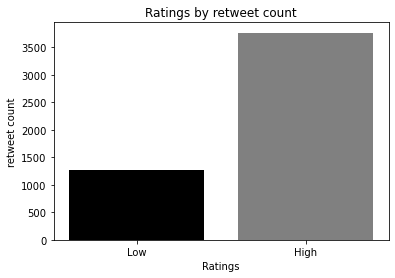

In [106]:
#creation of Bar charts
locations = [1, 2]
retweet_count = [low_ratings,high_ratings]
labels = ['Low', 'High']
plt.bar(locations, retweet_count, tick_label=labels,color=['black','grey'])
plt.title('Ratings by retweet count')
plt.xlabel('Ratings')
plt.ylabel('retweet count');

tweets with higher ratings have more retweets

#### what source do most tweets come from

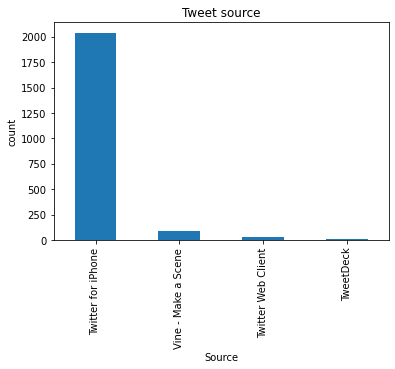

In [107]:
twit_main.source.value_counts().plot(kind="bar")
plt.title('Tweet source')
plt.xlabel('Source')
plt.ylabel('count');

### Visualization

#### What are the most used words in tweets

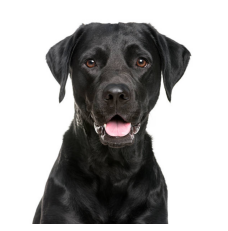

In [108]:
#Importing image mask
image = Image.open("dog.jpg")
plt.axis('off')
plt.imshow(image);

In [109]:
#creating stopwords
STOPWORDS=["HTTPS","https","h t t p s","t","co"]+list(STOPWORDS)

In [110]:
text = " ".join(text for text in twit_main.text)
print ("There are {} words in total for all tweets.".format(len(text)))

There are 262897 words in total for all tweets.


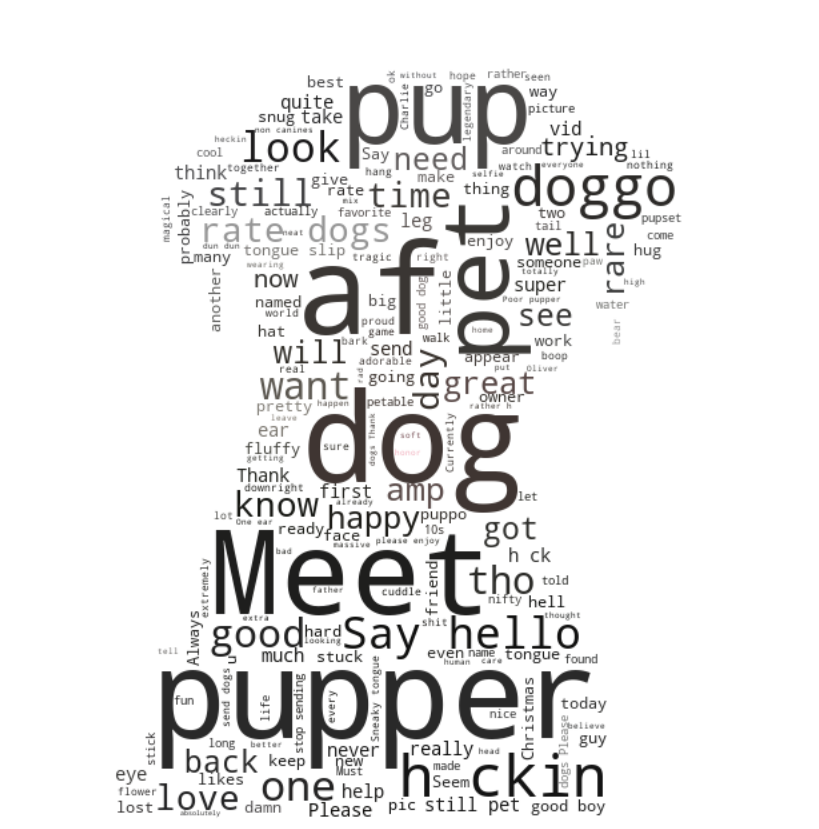

In [111]:

dog = np.array(image)
wordcloud = WordCloud(stopwords=STOPWORDS,mask=dog, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
image_colors = ImageColorGenerator(dog)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

#### From the image above we can see that the most words used in tweets are pupper,meet,dog,pop,dog_rates